# EGRMGMT 590.10 Homework 3

*Due at 6:15pm ET on Thursday, February 21*

## Instructions

+ There are 16 exercises in total. Exercise 1 through 14 require coding. Your grades are based on the accuracy of the results, not the code execution speed.
  + Exercise 1 to 7, 10, 11, 13, 15 and 16: each is worth 0.5 points. 
  + Exercise 8, 9, 12 and 14: 1 point.
+ Exercise 8 and 9 require to create the curves **from scratch** without relying on scikit-learn, Scikit-plot, or any other modules with functions or capabilities to "plug-in and plot" those curves.
+ Exercises are dependent on prior exercises. Please work on them in the pre-determined order.
+ Submit the .ipynb file to Sakai before 6:15pm ET on Thursday, February 21.
+ Assignments handed in late will lose 1 point every 24-hour window after 6:15pm ET on Thursday, February 21.

## Dataset

**Dataset Information:**

We'll be working on a breast cancer dataset containing 569 samples of malignant and benign tumor cells. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

+ 1st column: ID number 
+ 2nd column: Diagnosis (M = malignant, B = benign) 
+ 3rd - 32th columns: 30 numerical features computed for each cell nucleus

**Dataset Source:**
https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(Diagnostic)

## Exercises

**Exercise Overview**

+ We'll conduct classification analysis using the 30 numerical features to predict the likelihood that a given sample is malignant or benign. 

### Exercise 1 

+ Read the breast cancer dataset from its URL (https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data)
+ Keep the 30 numerical features in a NumPy array X
+ Use sklearn to encode the diagnosis labels (i.e. 'M' and 'B') to integers (i.e. 1 and 0) and keep the results in a NumPy array y

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import copy as copy
import os
from sklearn.model_selection import StratifiedKFold

In [2]:
raw_df = pd.read_csv\
('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data')
X = raw_df.iloc[ : , 2:].values
x_df = pd.DataFrame(X)
dl = raw_df.loc[ : ,'M']
le = preprocessing.LabelEncoder()
le.fit(['M', 'B'])
y = le.transform(dl)

### Exercise 2

+ Use matplotlib to create a matrix of histograms for the 30 input features
+ Each subplot is for a unique feature and includes two histograms: one for the malignant tumors and the other for the benign tumors
+ Observe how the distributions vary between the malignant and benign tumors 

In [3]:
col = []
for x in range(30):
    col.append(chr(97+x))

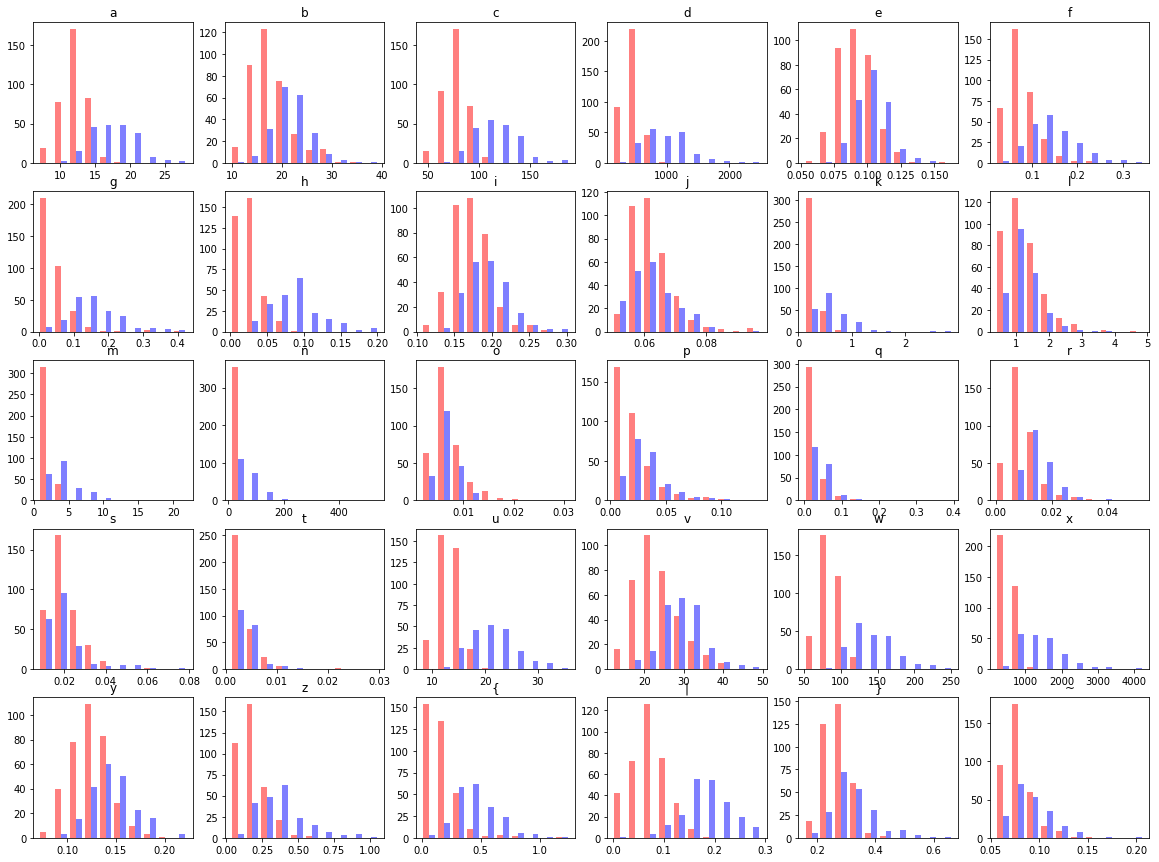

In [4]:
m_df = raw_df[raw_df['M'] == 'M'].iloc[ : , 2:]
b_df = raw_df[raw_df['M'] == 'B'].iloc[ : , 2:]
m_df.columns = col
b_df.columns = col
fig, ax = plt.subplots(5, 6, figsize=(20, 15))
for i in range(5):
    for j in range(6):
        ax[i, j].hist([b_df.iloc[:,i*6 + j], m_df.iloc[:,i*6 + j]], bins=10, alpha=0.5, color=['red', 'blue'])
        ax[i, j].set_title(m_df.columns[i*6 + j])

### Exercise 3

+ Use the stratified sampling approach to split the input features X and the output variable y into training and testing sets (i.e. X_train, y_train, X_test, and y_test) at a 8:2 ratio while preserving the proportions of malignant and benign tumors in each set
+ Compare the proportions of malignant and benign tumors among the overall, training, and testing sets

In [5]:

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

print((y == 1).sum() / len(X))
print((y_train == 1).sum() / len(y_train))
print((y_test == 1).sum() / len(y_test))

0.3714788732394366
0.3722466960352423
0.3684210526315789


Testset:

    proportions of malignant tumor is 0.631579
    
    proportions of benign tumors is 0.368421
   
Trainset:

    proportions of malignant tumor is 0.627753
    
    proportions of benign tumors is 0.372247

Overall:

    proportions of malignant tumor is 0.628521
    
    proportions of benign tumors is 0.371479

### Exercise 4

+ Use sklearn to create a Pipeline to process the data and build a classifier using the training dataset
+ The Pipeline includes three sequential steps:
  * Standardizing the 30 input features 
  * Using sklearn's PCA to reduce the 30 input features into 2 components
  * Fitting a logistic regression model using the 2 components as input variables
+ Apply the Pipeline to the training dataset and calculate its prediction accuracy rate

In [6]:
np.random.seed(42)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
asgm3_pipe = Pipeline([
    ("std_scaler", StandardScaler()),
    ("pca"       , PCA(n_components = 2)),
    ("log_reg"   , LogisticRegression(solver = 'liblinear'))    
])

tmp_res = asgm3_pipe.fit(X_train, y_train)
print(asgm3_pipe.score(X_train, y_train))
result_4 = asgm3_pipe.predict(X_train)
accuracy_score(result_4, y_train)

0.9625550660792952


0.9625550660792952

### accuracy_score is 0.9625550660792952

### Exercise 5

+ Create a precision and recall tradeoff chart using the training dataset and its predictions based on the Pipeline created in Exercise 4
+ Print the value of the optimal probability cut point for predicting the diagnosis outcomes

The optimal probability cut point: 0.491


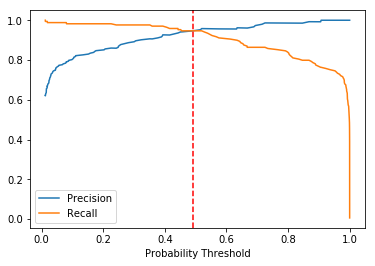

In [11]:
from sklearn.metrics import precision_recall_curve
y_train_prob = asgm3_pipe.predict_proba(X_train)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_prob[:, 1])
opt_threshold = thresholds[np.where(np.sign(precisions[:-1] - recalls[:-1])==0)[0]]
print('The optimal probability cut point: %.3f' % opt_threshold)
plt.plot(thresholds, precisions[:-1], label = 'Precision')
plt.plot(thresholds, recalls[:-1], label = 'Recall')
plt.xlabel('Probability Threshold')
plt.axvline(opt_threshold, color='red', linestyle='--')
plt.legend(loc = 'best')
plt.show()

### Exercise 6

+ Apply the Pipeline created in Exercise 4 and make predictions for the testing dataset
+ Calculate the following model quality metrics based on the testing dataset and its predictions
  * Confusion matrix
  * Precision score
  * Recall score
  * F1 score
  * ROC AUC score

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [14]:
X_test_pred = asgm3_pipe.predict(X_test)
cm = confusion_matrix(y_test, X_test_pred)
TN = cm[0][0]
TP = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
actual_pos = (y_test == True).sum()
actual_neg = (y_test == False).sum()
pred_neg = TN + FN
pred_pos = TP + FP
precision = TP / pred_pos
recall    = TP / actual_neg
f1_score  = 2 / ((1 / precision) + (1 / recall))
print(cm)
#print("pred_pos_corr = %d" %pred_pos_corr)
#print("pred_neg_corr = %d" %pred_neg_corr)
print("Precision = %F" %precision)
print("Recall = %F" %recall)
print("F1 score = %F" %f1_score)
X_prob = asgm3_pipe.predict_proba(X_test)
n_component = 2
fpr = dict()
tpr = dict()
thres = dict()
roc_auc = dict()
for i in range(n_component):
    fpr[i], tpr[i], thres[i] = roc_curve(y_test, X_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print("Roc_auc score%d = %F"  %(i, (roc_auc[i])))

[[69  3]
 [ 3 39]]
Precision = 0.928571
Recall = 0.541667
F1 score = 0.684211
Roc_auc score0 = 0.011574
Roc_auc score1 = 0.988426


Confusion Matrix:

 [[67 , 5]
 
 [ 4, 38]]
 
pred_pos_corr = 38

pred_neg_corr = 67

Precision = 0.883721

Recall = 0.904762

F1 score = 0.894118

Roc_auc = 0.970899

### Exercise 7

+ Use sklearn to create two ROC curves on the same chart for the Pipeline created in Exercise 4:
  * One ROC curve is based on the training dataset and its predictions
  * The other ROC curve is based on the testing dataset and its predictions
+ Assess the chances of overfitting and underfitting by comparing the two ROC curves

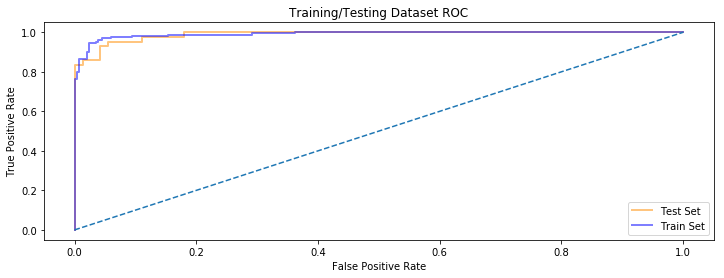

In [15]:
from sklearn import metrics
plt.rc('figure', figsize=(12, 4))
fig = plt.figure()
ax = fig.subplots(1)
lw = 2

ax.plot(fpr[1], tpr[1],color='darkorange', alpha = 0.5,lw=lw,label="Test Set")

X_train_prob = asgm3_pipe.predict_proba(X_train)
fpr_train, tpr_train, thres_train = roc_curve(y_train, X_train_prob[:, 1])
ax.plot(fpr_train, tpr_train, label="Train Set", color='blue', alpha = 0.5, 
      lw=lw)
ax.plot([0,1], [0,1], linestyle = "--")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Training/Testing Dataset ROC')
plt.legend()

### Exercise 8

+ Write a function plotROC(y, y_prob) to create a ROC curve from scratch:
    * y contains the actual outcomes
    * y_prob contains the predicted probabilities of the outcome occurring
+ Apply the plotROC function to the testing dataset and its prediction based on the Pipeline created in Exercise 4

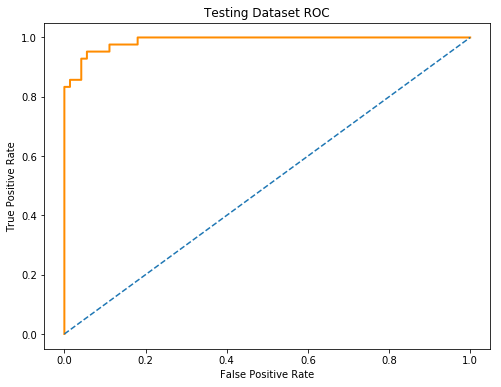

In [16]:
def plotRoc(y, y_prob):
    granularity = 1000
    TPR = np.empty(granularity+1)
    FNR = np.empty(granularity+1)
    thres = np.empty(granularity+1)
    actual_pos = (y == True).sum()
    actual_neg = (y == False).sum()
    fig = plt.figure(figsize = (8,6))
    ax = fig.subplots(1)
    for i in range(granularity + 1):
        add = 1 / granularity
        thres[i] = add * i
        pred_pos = (y_prob >= thres[i])
        #print(pred_pos)
        TPR[i] = ((y == 1) & (pred_pos == 1)).sum() / actual_pos
        FNR[i] = ((y == 0) & (pred_pos == 1)).sum() / actual_neg
        #print(TPR[i])
        #print(FNR[i])
    TPR.sort()
    FNR.sort()
    ax.plot(FNR, TPR, color='darkorange', lw=2, drawstyle = 'steps')
    ax.plot([0,1], [0,1], linestyle = "--")
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Testing Dataset ROC')
    return TPR, FNR, thres

X_prob_8 = asgm3_pipe.predict_proba(X_test)
tpr_8, fnr_8, tre_8 = plotRoc(y_test, X_prob_8[:, 1])

### Exercise 9

+ Create a cumulative gains chart from scratch using the testing dataset and its predictions based on the Pipeline created in Exercise 4

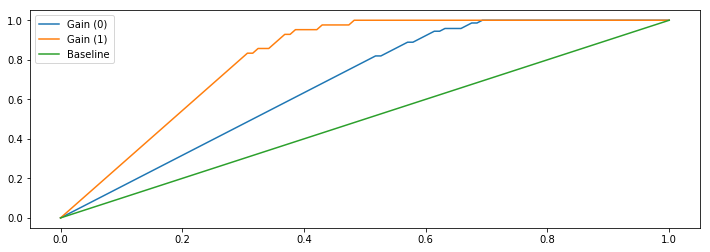

In [17]:
def gains(y, y_prob, label):
    idx_sorted = np.argsort(y_prob)[::-1]
    y_sorted = (y == label)[idx_sorted]
    gains = np.cumsum(y_sorted)/float(np.sum(y_sorted))
    baseline = np.arange(1, len(y_sorted) + 1)/float(len(y_sorted))
    return np.c_[np.insert(gains, 0, 0), np.insert(baseline, 0, 0)]

gains0 = gains(y_test, asgm3_pipe.predict_proba(X_test)[:, 0], 0)
gains1 = gains(y_test, asgm3_pipe.predict_proba(X_test)[:, 1], 1)
plt.plot(gains0[:, 1], gains0[:, 0], label = 'Gain (0)')
plt.plot(gains1[:, 1], gains1[:, 0], label = 'Gain (1)')
plt.plot([0, 1], [0, 1], label = 'Baseline')

plt.legend(loc = 'best')
plt.show()

### Exercise 10

+ Use sklearn to create a 10-fold stratified cross-validation for the training dataset while preserving the proportions of diagnosis in each fold
+ Re-fit the Pipeline specified in Exercise 4 via the 10-fold cross-validation on the training dataset, i.e. each iteration involves training the model on 9 folds and validating the model on the remaining 1 fold 
+ Print the accuracy rate of each of the validation fold

In [15]:
skf = StratifiedKFold(10, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X_train, y_train):
    X_train_10, X_test_10 = X_train[train_index], X_train[test_index]
    y_train_10, y_test_10 = y_train[train_index], y_train[test_index]
    tmp_res_10 = asgm3_pipe.fit(X_train_10, y_train_10)
    
    print(asgm3_pipe.score(X_test_10, y_test_10))
        

0.9782608695652174
0.9782608695652174
0.9565217391304348
0.9565217391304348
0.9782608695652174
0.9333333333333333
1.0
0.9777777777777777
0.9555555555555556
0.9090909090909091


### Exercise 11

+ Build a KNN classifier (*hint: sklearn's KNeighborsClassifier*) using the original 30 input features and find a set of top-performing hyperparameters (i.e. weights and number of neighbors) using a **grid search** with a 10-fold cross-validation on the training dataset
+ Identify the best combination of hyperparameters based on the F1 scores
+ Apply the best KNN classifier you identified to the testing dataset and calculate its F1 score based on its predictions

In [17]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh_gs = GridSearchCV(cv=10, 
             estimator = neigh,
             scoring = 'f1',
             param_grid = {
                 "n_neighbors" : list(range(1, 20)),
                 "weights"     : ['uniform', 'distance'],
                 #"algorithm"   : ['auto', 'ball_tree', 'kd_tree', 'brute'], 
                 "leaf_size"   : list(range(1,30,3)),
                 "metric":['euclidean','manhattan','chebyshev','minkowski'],   
             },
             return_train_score = True
             )

neigh_gs.fit(X_train, y_train)         

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'weights': ['uniform', 'distance'], 'leaf_size': [1, 4, 7, 10, 13, 16, 19, 22, 25, 28], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [18]:
df_result_matrix = pd.DataFrame(neigh_gs.cv_results_)
df_result_matrix.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_metric,param_n_neighbors,param_weights,params,split0_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.000915,0.000253,0.001413,0.000259,1,euclidean,1,uniform,"{'leaf_size': 1, 'metric': 'euclidean', 'n_nei...",0.882353,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.001106,0.000268,0.001738,0.000547,1,euclidean,1,distance,"{'leaf_size': 1, 'metric': 'euclidean', 'n_nei...",0.882353,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.000866,0.000203,0.001313,0.000090,1,euclidean,2,uniform,"{'leaf_size': 1, 'metric': 'euclidean', 'n_nei...",0.903226,...,0.921986,0.929577,0.918149,0.914286,0.914286,0.921986,0.918149,0.918728,0.918569,0.004986
3,0.000752,0.000030,0.001253,0.000033,1,euclidean,2,distance,"{'leaf_size': 1, 'metric': 'euclidean', 'n_nei...",0.882353,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.000834,0.000276,0.001435,0.000276,1,euclidean,3,uniform,"{'leaf_size': 1, 'metric': 'euclidean', 'n_nei...",0.882353,...,0.935154,0.932432,0.942373,0.920962,0.928814,0.935154,0.939597,0.935593,0.932347,0.006716


In [19]:
print(neigh_gs.best_params_)
print(neigh_gs.best_score_)

{'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
0.9263374562019225


### The best combination of hyperparameters is : 'n_neighbors': 7, 'weights': 'uniform', 'leaf_size': 1, 'metric': 'manhattan'

In [20]:
from sklearn.metrics import f1_score
knn_best = KNeighborsClassifier(n_neighbors = 7, weights = 'uniform', metric = 'manhattan', leaf_size = 1)
knn_best.fit(X_train, y_train)
X_pred_11 = knn_best.predict(X_test)
f1_score(X_pred_11, y_test)

0.888888888888889

The F1 score for KNN using best hyperparameter combination I found is 0.889

### Exercise 12

+ Create a chart to visualize the grid search results of Exercise 11
+ Visualize how the average model quality metric of the validation folds varies across different combinations of hyperparameters 
+ Demonstrate the best hyperparameter combination identified in Exercise 11 indeed resulted in the highest model quality metric

In [21]:
df_result_matrix.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_metric,param_n_neighbors,param_weights,params,split0_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.000915,0.000253,0.001413,0.000259,1,euclidean,1,uniform,"{'leaf_size': 1, 'metric': 'euclidean', 'n_nei...",0.882353,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.001106,0.000268,0.001738,0.000547,1,euclidean,1,distance,"{'leaf_size': 1, 'metric': 'euclidean', 'n_nei...",0.882353,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.000866,0.000203,0.001313,0.000090,1,euclidean,2,uniform,"{'leaf_size': 1, 'metric': 'euclidean', 'n_nei...",0.903226,...,0.921986,0.929577,0.918149,0.914286,0.914286,0.921986,0.918149,0.918728,0.918569,0.004986
3,0.000752,0.000030,0.001253,0.000033,1,euclidean,2,distance,"{'leaf_size': 1, 'metric': 'euclidean', 'n_nei...",0.882353,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.000834,0.000276,0.001435,0.000276,1,euclidean,3,uniform,"{'leaf_size': 1, 'metric': 'euclidean', 'n_nei...",0.882353,...,0.935154,0.932432,0.942373,0.920962,0.928814,0.935154,0.939597,0.935593,0.932347,0.006716


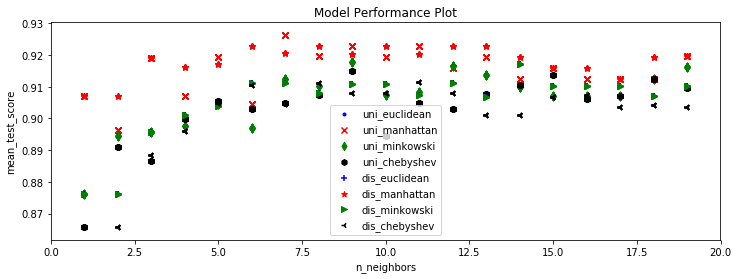

In [22]:
df_12 = df_result_matrix[['param_n_neighbors', 'param_weights', 'mean_test_score', 
                          'param_metric', 'param_leaf_size', ]]
df_12_uniform = df_12[df_12['param_weights'] == 'uniform']
df_12_distance = df_12[df_12['param_weights'] == 'distance']
df_12_uni_euclidean = df_12_uniform[df_12_uniform['param_metric'] == 'euclidean']
df_12_uni_manhattan = df_12_uniform[df_12_uniform['param_metric'] == 'manhattan']
df_12_uni_minkowski = df_12_uniform[df_12_uniform['param_metric'] == 'minkowski']
df_12_uni_chebyshev = df_12_uniform[df_12_uniform['param_metric'] == 'chebyshev']
df_12_dis_euclidean = df_12_distance[df_12_distance['param_metric'] == 'euclidean']
df_12_dis_manhattan = df_12_distance[df_12_distance['param_metric'] == 'manhattan']
df_12_dis_minkowski = df_12_distance[df_12_distance['param_metric'] == 'minkowski']
df_12_dis_chebyshev = df_12_distance[df_12_distance['param_metric'] == 'chebyshev']

fig_12, ax_12= plt.subplots(1,1)
ax_12.scatter(df_12_uni_euclidean['param_n_neighbors'], df_12_uni_euclidean['mean_test_score'], color = "blue", label = 
         "uni_euclidean", marker = '.')
ax_12.scatter(df_12_uni_manhattan['param_n_neighbors'], df_12_uni_manhattan['mean_test_score'], color = "red", label = 
         "uni_manhattan", marker = 'x')
ax_12.scatter(df_12_uni_minkowski['param_n_neighbors'], df_12_uni_minkowski['mean_test_score'], color = "green", label = 
         "uni_minkowski", marker = 'd')
ax_12.scatter(df_12_uni_chebyshev['param_n_neighbors'], df_12_uni_chebyshev['mean_test_score'], color = "k", label = 
         "uni_chebyshev", marker = 'h')
ax_12.scatter(df_12_dis_euclidean['param_n_neighbors'], df_12_dis_euclidean['mean_test_score'], color = "blue", label = 
         "dis_euclidean", marker = '+')
ax_12.scatter(df_12_dis_manhattan['param_n_neighbors'], df_12_dis_manhattan['mean_test_score'], color = "red", label = 
         "dis_manhattan", marker = '*')
ax_12.scatter(df_12_dis_minkowski['param_n_neighbors'], df_12_dis_minkowski['mean_test_score'], color = "green", label = 
         "dis_minkowski", marker = '>')
ax_12.scatter(df_12_dis_chebyshev['param_n_neighbors'], df_12_dis_chebyshev['mean_test_score'], color = "k", label = 
         "dis_chebyshev", marker = '3')
ax_12.set_title('Model Performance Plot')
ax_12.set_xlabel('n_neighbors')
ax_12.set_ylabel('mean_test_score')
#ax_12.plot(df_12_distance['param_n_neighbors'], df_12_distance['mean_test_score'], color = "red", label = 
             #"distance")
plt.legend(loc = 'best')
#ax_12[0].set_title('distance')
#ax_12[0].set_xlabel('n_neighbors')
#ax_12[0].set_ylabel('mean_test_score')

In [225]:
cvres = neigh_gs.cv_results_
cv_res = pd.DataFrame(cvres).loc[:, ['param_leaf_size', 'param_n_neighbors',
                                     'param_weights', 'param_metric', 'mean_test_score']]

cv_res.sort_values(by = 'mean_test_score', ascending=False).head()

,param_leaf_size,param_n_neighbors,param_weights,param_metric,mean_test_score
1418,28,7,uniform,manhattan,0.926337
506,10,7,uniform,manhattan,0.926337
1114,22,7,uniform,manhattan,0.926337
50,1,7,uniform,manhattan,0.926337
962,19,7,uniform,manhattan,0.926337


## As shown in the figures above, the point with n_neighbors = 7 and weight = uniform and metric = manhattan has the best mean test score, so it is the best combination of hyperparameters 

### Exercise 13

+ Build a KNN classifier (*hint: sklearn's KNeighborsClassifier*) using the original 30 input features and find a set of top-performing hyperparameters (i.e. weights and number of neighbors) using a **random search** with a 10-fold cross-validation on the training dataset
+ Identify the best combination of hyperparameters based on the F1 scores
+ Apply the best KNN classifier you identified to the testing dataset and calculate the F1 score based on its predictions

In [23]:
from sklearn.model_selection import RandomizedSearchCV
neigh_13 = KNeighborsClassifier()
random_search = RandomizedSearchCV(estimator = neigh_13, 
                                   param_distributions={
                                     "n_neighbors" : list(range(1, 20)),
                                     "weights"     : ['uniform', 'distance'],
                                     "leaf_size"   : list(range(1,30,3)),
                                     "metric":['euclidean','manhattan','chebyshev','minkowski'], 
                                   }, 
                                   cv=10, 
                                   return_train_score = True,
                                   scoring = 'f1'
                                  )
random_search.fit(X_train, y_train)


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'weights': ['uniform', 'distance'], 'leaf_size': [1, 4, 7, 10, 13, 16, 19, 22, 25, 28], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='f1', verbose=0)

In [24]:
random_search.best_params_

{'weights': 'distance',
 'n_neighbors': 11,
 'metric': 'manhattan',
 'leaf_size': 22}

### Best parameter
+ 'weights': 'distance',
+ 'n_neighbors': 11,
+ 'metric': 'manhattan',
+ 'leaf_size': 22

In [35]:
random_search.best_score_

0.9204005792129281

### Exercise 14

+ Build a KNN classifier via a 10-fold cross-validation on the training dataset using the 30 original input features and the best hyperparameters identified in Exercise 13
+ Build a Random Forest classifier via a 10-fold cross validation on the training dataset using the 30 original input features and setting 50 as the number of trees in the forest
+ Create a pair of box plots to compare a model quality metric across the validation folds used to validate the KNN and Random Forest models

0.9137931034482759
0.9827586206896551
0.8421052631578947
0.8596491228070176
0.9122807017543859
0.9298245614035088
0.9473684210526315
0.9473684210526315
0.9649122807017544
0.9473684210526315
0.9473684210526315
0.9824561403508771
0.9824561403508771
0.9122807017543859
0.9642857142857143
0.9821428571428571
0.9285714285714286
0.9464285714285714
0.9821428571428571
0.9821428571428571


Text(0.5, 1.0, 'rfc_socre')

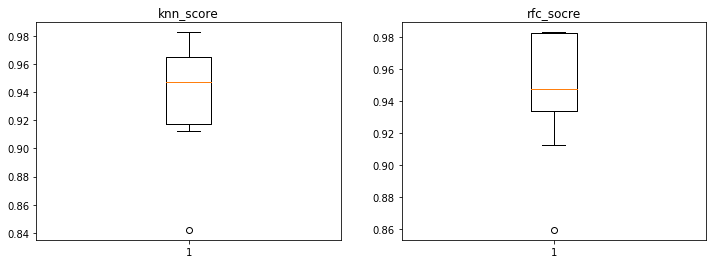

In [34]:
from sklearn.ensemble import RandomForestClassifier
knn_best_14 = KNeighborsClassifier(n_neighbors = 11, weights = 'distance', metric = 'manhattan', leaf_size = 22)
rfc_14 = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=42)
knn_score = []
rfc_socre = []
skf = StratifiedKFold(10, shuffle=False, random_state=42)
for train_index_14, test_index_14 in skf.split(X, y):
    X_train_14, X_test_14 = X[train_index_14], X[test_index_14]
    y_train_14, y_test_14 = y[train_index_14], y[test_index_14]
    knn_best_14.fit(X_train_14, y_train_14)
    knn_score.append(knn_best_14.score(X_test_14, y_test_14))
    rfc_14.fit(X_train_14, y_train_14)
    rfc_socre.append(rfc_14.score(X_test_14, y_test_14))
    print(knn_best_14.score(X_test_14, y_test_14))
    print(rfc_14.score(X_test_14, y_test_14)) 
    
fig14, ax14 = plt.subplots(1,2)
ax14[0].boxplot(knn_score)
ax14[0].set_title("knn_score")
ax14[1].boxplot(rfc_socre)
ax14[1].set_title("rfc_socre")

### Exercise 15

+ Explain how the bias and variance would change when using a large vs. small k for the k-fold cross-validation

+ The larger the k, the larger the bias is, and vice versa.
+ The larger the k, the smaller the variance is, and vice versa.

### Exercise 16

+ Explain the difference between probability, odds, and odds ratio

+ Suppose an event has two possible outcomes: A, B
+ probability of A = p = the likelihood of A.
+ odds of A= p / 1-p
+ odds ratio of A = odds of A / odds of B